<a href="https://colab.research.google.com/github/Liiura/machine-learning/blob/main/Sign_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import data and libraries

In [91]:
import pandas as pd
from google.colab import files
import io
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from google.colab import drive
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
drive.mount('/gdrive/')

Drive already mounted at /gdrive/; to attempt to forcibly remount, call drive.mount("/gdrive/", force_remount=True).


In [ ]:
sign_mnist = pd.read_csv('/gdrive/MyDrive/Proyecto IA/sign_mnist_train.csv') #pablo

In [93]:
sign_mnist = pd.read_csv('/gdrive/MyDrive/Recopilación de datos útiles/sign_mnist_train.csv') # alvaro

In [ ]:
sign_mnist = pd.read_csv('/gdrive/MyDrive/sign_mnist_train.csv') # pipe

# Display data

In [94]:
train_data_array = np.array(sign_mnist, dtype = 'float32') 

In [95]:
sign_mnist.shape

(27455, 785)

In [96]:
classification = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 
               'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y','Z' ]

In [97]:
def displaySomesImages():
  axes=[]
  fig=plt.figure(figsize = (20,20))
  rows = 5
  cols = 3
  for a in range(15):
      axes.append( fig.add_subplot(rows, cols, a+1) )
      subplot_title=("Seña"+str(a))
      axes[-1].set_title(subplot_title)  
      plt.imshow(train_data_array[a,1:].reshape((28,28)))
      print(classification[int(train_data_array[a,0])])

D
G
C
C
N
Q
I
W
D
D
S
K
Q
W
U


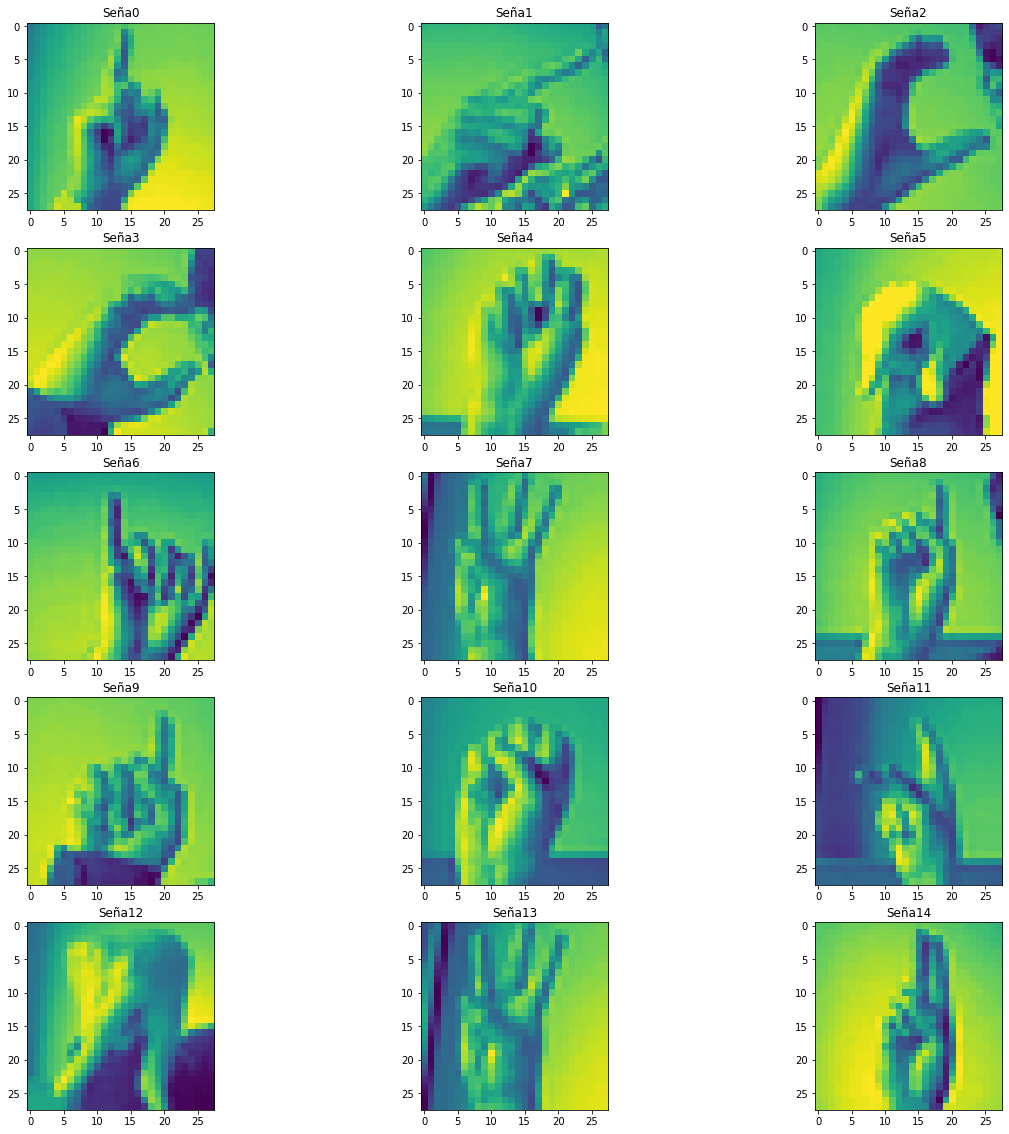

In [98]:
displaySomesImages()

# Split data for training

In [99]:
X,Y=train_data_array[:,1:],train_data_array[:,0]

In [100]:
X.shape

(27455, 784)

In [101]:
Y.shape

(27455,)

In [102]:
x_train,x_test,y_train,y_test = X[:1000],X[1000:],Y[:1000],Y[1000:]
x_test,y_test = x_test[:200], y_test[:200]

# Share Methods

In [103]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)


In [104]:
def display_score(scores):
  print("Scores",scores)
  print("Mean",scores.mean())
  print("standard desviation",scores.std()) # mostramos los scores

In [105]:
def display_other_scores(y_train_pred):
  error_params = ['micro','macro','weighted']
  for i in error_params:
    print("Show results with",i)
    print("Precision score",precision_score(y_train[:1000], y_train_pred,average=i))
    print("Recall score",recall_score(y_train[:1000], y_train_pred,average=i))
    print("F1 score",f1_score(y_train[:1000], y_train_pred,average=i))
    print("\n")


# Training SGDClassifier

In [106]:
some_letter = x_test[9,:] #
print(classification[int(y_test[9])])

D


In [107]:
sgd_clf = SGDClassifier()


In [108]:
sgd_clf_cross_val = cross_val_score(sgd_clf, x_train, y_train, cv=3, scoring="accuracy") # utilizamos el accuracy porque el dataset está bien balanceado
display_score(sgd_clf_cross_val)

Scores [0.60479042 0.58258258 0.58858859]
Mean 0.5919871967776159
standard desviation 0.009379406683361525


Hasta el momento podemos ver que el modelo nos es muy bueno trabajando solo con mil datos, sin embargo, para este trabajo se volvió necesario limitar la cantidad de datos porque los cross validatios y los GridSearch tienen un alto tiempo de procesamiento

# Confusion matrix and error metrics of SDGClassifier

En esta sección veremos algunos análisis como la matriz de confusión y algunas métricas de errores que nos darán mucha más información acerca del modelo

In [110]:
grid = {
    'alpha': [1e-4, 1e-3, 1e-2], # learning rate
    'max_iter': [5000,4000,3000], # number of epochs
    'loss': ['log','hinge'],
    'penalty': ['l2','l1'],
    'n_jobs': [-1]
}

In [111]:
grid_search = GridSearchCV(sgd_clf, grid, cv=3,
                           scoring='accuracy',
                           return_train_score=True)

In [112]:
grid_search.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


GridSearchCV(cv=3, estimator=SGDClassifier(),
             param_grid={'alpha': [0.0001, 0.001, 0.01],
                         'loss': ['log', 'hinge'],
                         'max_iter': [5000, 4000, 3000], 'n_jobs': [-1],
                         'penalty': ['l2', 'l1']},
             return_train_score=True, scoring='accuracy')

In [113]:
grid_search.best_params_

{'alpha': 0.0001,
 'loss': 'hinge',
 'max_iter': 5000,
 'n_jobs': -1,
 'penalty': 'l1'}

In [114]:
sgd_clf = SGDClassifier(alpha=0.001,loss='log',max_iter=5000,n_jobs=-1,penalty='l1')

In [115]:
sgd_clf_cross_val = cross_val_score(sgd_clf, x_train, y_train, cv=3, scoring="accuracy") # utilizamos el accuracy porque el dataset está bien balanceado
display_score(sgd_clf_cross_val)

Scores [0.6497006  0.64564565 0.62462462]
Mean 0.6399902896908886
standard desviation 0.0109905537765334


Comos se puede observar vemos una mejora en el modelo al momento encontrar los mejores parámetros con el GridSearch que cuando lo trabajamos con los sensible defaults

In [116]:
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train, cv=3)

In [117]:
conf_matrix=confusion_matrix(y_train, y_train_pred)

In [118]:
display_other_scores(y_train_pred)

Show results with micro
Precision score 0.654
Recall score 0.654
F1 score 0.654


Show results with macro
Precision score 0.6525990928513096
Recall score 0.6353831288699744
F1 score 0.6391650960921605


Show results with weighted
Precision score 0.6663732784937624
Recall score 0.654
F1 score 0.6558054300156382




Luego de entrenar el modelo con los mejores parametros dados por el GridSearch, obtenemos los scores utilizando los parametros Micro, Macro y Weighted, y evidenciamos que para el micro se obtienen los mejores scores

In [119]:
sgd_clf.fit(x_train, y_train)


SGDClassifier(alpha=0.001, loss='log', max_iter=5000, n_jobs=-1, penalty='l1')

In [120]:
sign_pred = sgd_clf.predict([some_letter])[0]
print("the prediction was",classification[int(sign_pred)])

the prediction was D


# Graphs SGDClassifier

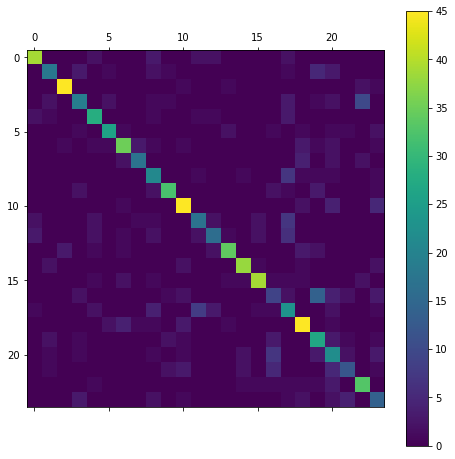

In [122]:
plot_confusion_matrix(conf_matrix)

En la grafica observamos en la diagonal los True positive, donde en algunos se tiene una buena tendencia hacia los colores verde y amarillo

# SVC

In [123]:
svc_clf = SVC()

In [124]:
svc_clf_cross_val = cross_val_score(svc_clf, x_train, y_train, cv=3, scoring="accuracy") # utilizamos el accuracy porque el dataset está bien balanceado
display_score(sgd_clf_cross_val)

Scores [0.6497006  0.64564565 0.62462462]
Mean 0.6399902896908886
standard desviation 0.0109905537765334


Podemos observar que los scores son mucho mejores que los de SDG classifier incluso teniendo los sensible defaults

# Confusion matrix and error metrics of SVC model

In [125]:
grid = {
    'C': [1.0,1.2], # learning rate
    'kernel': ['linear', 'poly', 'rbf'],
    'max_iter': [1500,1300,1100], # number of epochs
    'gamma': ['scale', 'auto'],
    'tol': [1e-4, 1e-3, 1e-2]
}

In [126]:
grid_search = GridSearchCV(svc_clf, grid, cv=3,
                           scoring='accuracy',
                           return_train_score=True)

In [ ]:
grid_search.fit(x_train, y_train)

In [128]:
grid_search.best_params_

{'C': 1.0,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': 1500,
 'tol': 0.0001}

In [129]:
svc_clf = SVC(C=1.0,gamma='scale',kernel='linear',max_iter=1500,tol=0.0001)

In [ ]:
svc_clf_cross_val = cross_val_score(svc_clf, x_train, y_train, cv=3, scoring="accuracy") # utilizamos el accuracy porque el dataset está bien balanceado


In [131]:
display_score(sgd_clf_cross_val)

Scores [0.6497006  0.64564565 0.62462462]
Mean 0.6399902896908886
standard desviation 0.0109905537765334


Comos se puede observar se tiene el mismo resultado del modelo al momento utilizar los mejores parametros dados por grid search, que con lo sensible defaults

In [132]:
y_train_pred = cross_val_predict(svc_clf, x_train, y_train, cv=3)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


In [133]:
conf_matrix=confusion_matrix(y_train, y_train_pred)

**Medimos la precision del modelo con diferentes métricas y evaluamos la mejor**

In [134]:
display_other_scores(y_train_pred)

Show results with micro
Precision score 0.78
Recall score 0.78
F1 score 0.78


Show results with macro
Precision score 0.7728692341586726
Recall score 0.7604146616389483
F1 score 0.7620992337277338


Show results with weighted
Precision score 0.7782656614277359
Recall score 0.78
F1 score 0.7751559735198994




Luego de entrenar el modelo con los mejores parametros dados por el GridSearch, se obtiene una buena mejora en los scores, claramente funciona mucho mejor para el parametro micro

In [135]:
svc_clf.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


SVC(kernel='linear', max_iter=1500, tol=0.0001)

In [136]:
sign_pred= svc_clf.predict([some_letter])
print("the prediction was",classification[int(sign_pred)])

the prediction was D


# Graphs SVC

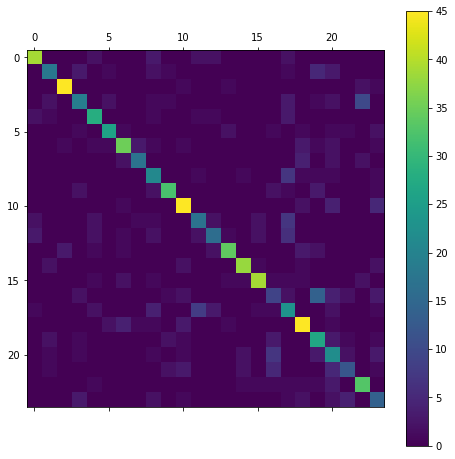

In [121]:
plot_confusion_matrix(conf_matrix)

Como se puede observar en la grafica, se tiene una mayor tendencia a los colores verde y amarillo, con respecto a el SDG

# Using Kneighbors

In [137]:
knn_classif = KNeighborsClassifier()

In [138]:
sgd_clf_cross_val = cross_val_score(knn_classif, x_train, y_train, cv=3, scoring="accuracy") # utilizamos el accuracy porque el dataset está bien balanceado
display_score(sgd_clf_cross_val)

Scores [0.47005988 0.47447447 0.51051051]
Mean 0.48501495507483533
standard desviation 0.018117940846851453


# Confusion matrix and error metrics of KNeighborsClassifier model

In [139]:
grid = {
    'n_neighbors': [1,2,3,4], # learning rate
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], # number of epochs
}

In [140]:
grid_search = GridSearchCV(knn_classif, grid, cv=3,
                           scoring='accuracy',
                           return_train_score=True)

In [141]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4],
                         'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='accuracy')

In [142]:
grid_search.best_params_

{'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}

In [143]:
knn_classif = KNeighborsClassifier(algorithm='auto',n_neighbors=1,weights='uniform')

In [144]:
knn_classif_cross_val = cross_val_score(knn_classif, x_train, y_train, cv=3, scoring="accuracy") # utilizamos el accuracy porque el dataset está bien balanceado
display_score(sgd_clf_cross_val)

Scores [0.47005988 0.47447447 0.51051051]
Mean 0.48501495507483533
standard desviation 0.018117940846851453


Comos se puede observar se tiene el mismo resultado del modelo al momento utilizar los mejores parametros dados por grid search, que con lo sensible defaults

In [145]:
y_train_pred = cross_val_predict(knn_classif, x_train, y_train, cv=3)

In [146]:
conf_matrix=confusion_matrix(y_train, y_train_pred)

In [147]:
display_other_scores(y_train_pred)

Show results with micro
Precision score 0.644
Recall score 0.644
F1 score 0.644


Show results with macro
Precision score 0.6450709709369988
Recall score 0.6199574405090003
F1 score 0.6236211285307314


Show results with weighted
Precision score 0.6629087243684257
Recall score 0.644
F1 score 0.6447084553170118




Al obtener los scores utilizando los parametros Micro, Macro y Weighted, evidenciamos que para el Weighted se obtienen los mejores scores aunque no se obtuvieron muy buenos resultados

In [148]:
knn_classif.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [149]:
sign_pred= knn_classif.predict([some_letter])
print("the prediction was",classification[int(sign_pred)])

the prediction was D


Siendo uno de los más bajos resultados entre  los modelos, este predijo correctamente para la letra D, esto no quiere decir que sea un modelo confiable

# Graphs KNeighborsClassifier

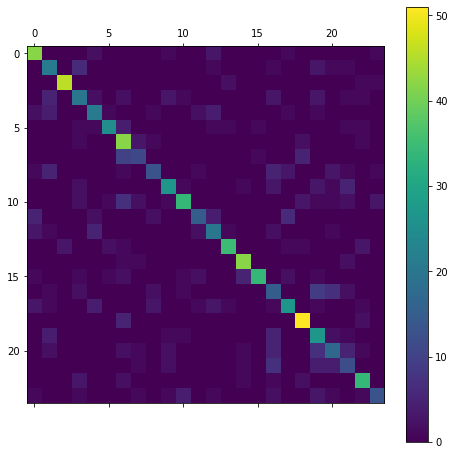

In [150]:
plot_confusion_matrix(conf_matrix)

Para este modelo la tedencia de los true positives es mucho inferior, sin embargo realizo correctamente la predición para la letra D

# Using RandomForest

In [151]:
clf_ramdom_fores = RandomForestClassifier()

In [152]:
sgd_clf_cross_val = cross_val_score(clf_ramdom_fores, x_train, y_train, cv=3, scoring="accuracy") # utilizamos el accuracy porque el dataset está bien balanceado
display_score(sgd_clf_cross_val)

Scores [0.64071856 0.58858859 0.59459459]
Mean 0.6079672486858115
standard desviation 0.023288115178326158


# Confusion matrix and error metrics of RandomForest model

In [153]:
grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [154]:
grid_search = GridSearchCV(clf_ramdom_fores, grid, cv=3,
                           scoring='accuracy',
                           return_train_score=True)

In [155]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]},
             return_train_score=True, scoring='accuracy')

In [156]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

Una vez obtenidos los mejores parámetros volvemos a crear el modelo pero asignando unos nuevos hiperparámetros con el fin de mejorar la calidad del modelo

In [157]:
clf_ramdom_fores = RandomForestClassifier(criterion='entropy',max_depth=8,max_features='auto',n_estimators=200)

In [158]:
clf_ramdom_foresf_cross_val = cross_val_score(clf_ramdom_fores, x_train, y_train, cv=3, scoring="accuracy") # utilizamos el accuracy porque el dataset está bien balanceado
display_score(sgd_clf_cross_val)

Scores [0.64071856 0.58858859 0.59459459]
Mean 0.6079672486858115
standard desviation 0.023288115178326158


Asignando los parámetros y haciendo el cross validation curisoamente se demora mucho más que cuando se ejecuta son los sensible defaults y además obtenemos los mismos resultados

In [159]:
conf_matrix=confusion_matrix(y_train, y_train_pred)

In [160]:
y_train_pred = cross_val_predict(clf_ramdom_fores, x_train, y_train, cv=3)
conf_matrix=confusion_matrix(y_train, y_train_pred)

In [161]:
display_other_scores(y_train_pred)

Show results with micro
Precision score 0.639
Recall score 0.639
F1 score 0.639


Show results with macro
Precision score 0.6583795498986765
Recall score 0.6051013216172886
F1 score 0.6034689516510068


Show results with weighted
Precision score 0.6548750293545492
Recall score 0.639
F1 score 0.6254337352604598




No se evidencia mucha diferencia entre los scores arrojados para cada parametro, sin embargo entre los 3 parametros el de mejor resultado es el weighted

In [162]:
clf_ramdom_fores.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=200)

In [167]:
sign_pred= clf_ramdom_fores.predict([some_letter])
print("the prediction was",classification[int(sign_pred)])

the prediction was D


# Graphs RandomForest

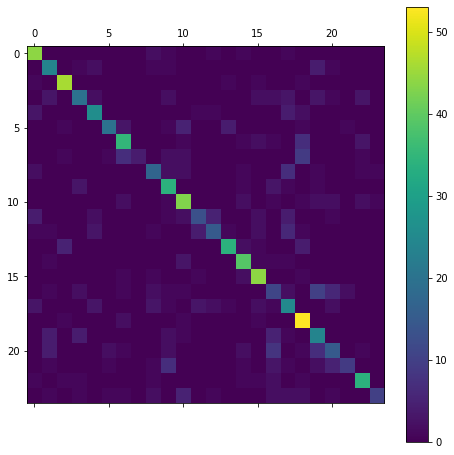

In [165]:
plot_confusion_matrix(conf_matrix)

Finalmente para este modelo tambien se tiene una diagonal principal de los true postive resultados relativamente regulares